In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

Welcome to JupyROOT 6.26/08


In [2]:
def file_conversion(input_file, output_file):
    f = open(const.REF_DIR+f"/{input_file}")

    lines = []
    for line in f.readlines():
        l = line.split(",")
        temp = []
        for s in l:
            s = s.replace("'", '')
            try:
                temp.append(float(s))
            except:
                print(s)
                continue
        if len(temp)>0:
            lines.append(temp)

    lines = np.asarray(lines)
    print(lines)
    tab = Table(lines, names = ["x", "dNdE", "mass"])
    np.save(const.REF_DIR+f"/{output_file}.npy",tab)
    
def change_file(new, old):
    os.system("mv "+const.REF_DIR+f"/wino_dnde.npy "+const.REF_DIR+f"/{old}.npy" )
    os.system("mv "+const.REF_DIR+f"/{new}.npy "+const.REF_DIR+f"/wino_dnde.npy" )

In [3]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [22]:
change_file("wino_dnde_res_lo", "wino_dnde_res_hi")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [30]:
mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=[2800], addTheta=False, averagedIRF=True, useBias=True, 
                            correction=True, bkgModel="gaus", filename="test",
                            )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2800 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/test.npy'


Text(0.5, 1.0, '')

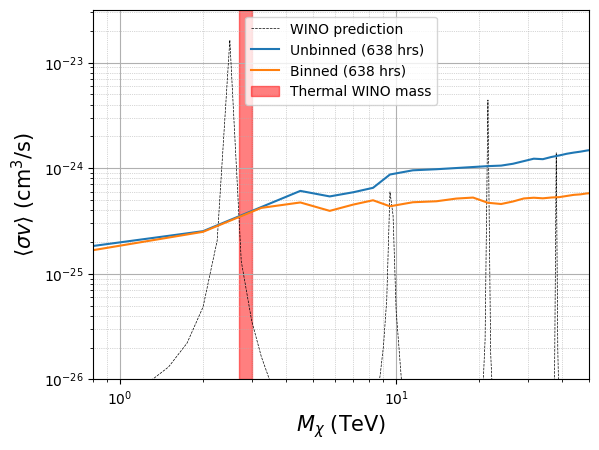

In [16]:
plotPredictedLine(units="TeV", color="k", ls="--", lw=0.5, label="WINO prediction")

plotULcurve("wino_nlo_lo_combined", add_input="wino_nlo_hi_combined", label="Unbinned (638 hrs)",units="TeV")
plotULcurve("wino_nlo_lo_combined_binned", add_input="wino_nlo_hi_combined_binned", label="Binned (638 hrs)",units="TeV")
plt.legend(fontsize=13)

plt.yscale("log")
plt.axvspan(2.7, 3.0, color="red", label="Thermal WINO mass", alpha=0.5)
plt.xscale("log")
plt.ylim(1e-26)
plt.xlim(0.8, 50)
plt.legend()
plt.title("")

Text(0.5, 1.0, '')

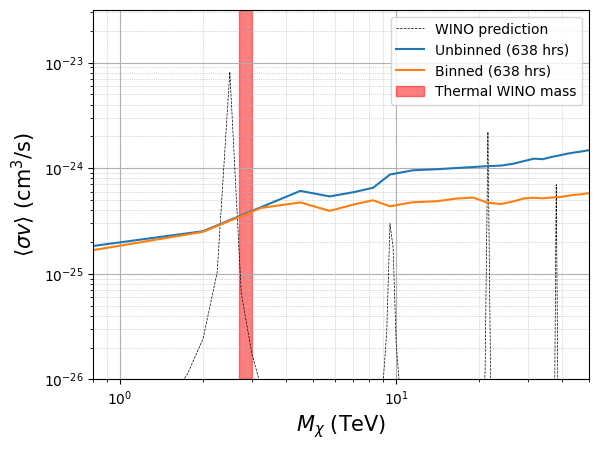

In [14]:
plotPredictedLine(units="TeV", color="k", ls="--", lw=0.5, label="WINO prediction")

plotULcurve("wino_nlo_lo_combined", add_input="wino_nlo_hi_combined", label="Unbinned (638 hrs)",units="TeV")
plotULcurve("wino_nlo_lo_combined_binned", add_input="wino_nlo_hi_combined_binned", label="Binned (638 hrs)",units="TeV")
plt.legend(fontsize=13)

plt.yscale("log")
plt.axvspan(2.7, 3.0, color="red", label="Thermal WINO mass", alpha=0.5)
plt.xscale("log")
plt.ylim(1e-26)
plt.xlim(0.8, 50)
plt.legend()
plt.title("")

Text(0.5, 1.0, '')

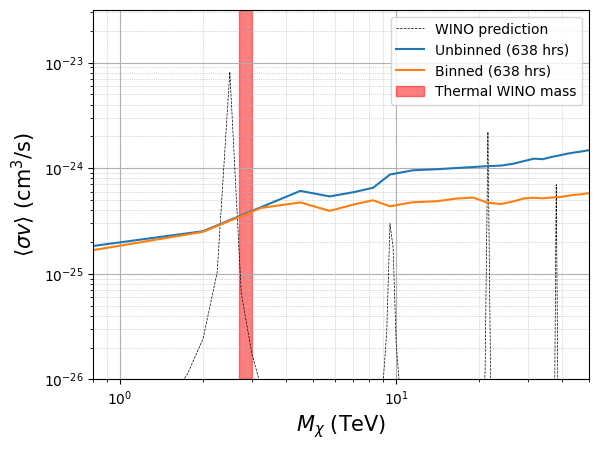

In [41]:
plotPredictedLine(units="TeV", color="k", ls="--", lw=0.5, label="WINO prediction")

plotULcurve("wino_nlo_lo_combined", add_input="wino_nlo_hi_combined", label="Unbinned (638 hrs)",units="TeV")
plotULcurve("wino_nlo_lo_combined_binned", add_input="wino_nlo_hi_combined_binned", label="Binned (638 hrs)",units="TeV")
plt.legend(fontsize=13)

plt.yscale("log")
plt.axvspan(2.7, 3.0, color="red", label="Thermal WINO mass", alpha=0.5)
plt.xscale("log")
plt.ylim(1e-26)
plt.xlim(0.8, 50)
plt.legend()
plt.title("")

In [10]:
change_file("wino_dnde_res_lo", "wino_dnde_res_hi")
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [11]:
mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, 
                                     DM_spectra="WINO",mass=mass[::5], addTheta=False, averagedIRF=True, 
                                     statistic="binned",
                                     useBias=True, correction=True, bkgModel="gaus", 
                                     filename="wino_nlo_lo_combined_binned",)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 54 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_nlo_lo_combined_binned.npy'
 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.


cp: /Users/dtak/Research/DarkMatter/Output/wino_nlo_lo_combined_binned.npy: No such file or directory


In [9]:
#change_file("wino_dnde_res_hi", "wino_dnde_res_lo")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=mass[::5], addTheta=False, averagedIRF=True, useBias=True, statistic="binned",
                            correction=True, bkgModel="gaus", filename="wino_nlo_hi_combined_binned",
                            )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_nlo_hi_combined_binned.npy'
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 18 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 18 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 18 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *********************************************

cp: /Users/dtak/Research/DarkMatter/Output/wino_nlo_hi_combined_binned.npy: No such file or directory


In [25]:
change_file("wino_dnde_res_hi", "wino_dnde_res_lo")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [44]:
change_file("wino_dnde_res_hi", "wino_dnde_res_lo")

In [45]:
ebins = np.logspace(1, 7, 101)
uls = {}

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

mass = mass[::5]

for i in trange(300):
    
    
    ul = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, 
                                         ext=True, DM_spectra="WINO",sys=True, mass=mass, addTheta=False, 
                                        averagedIRF=True, useBias=True, statistic="binned",
                                        correction=True, bkgModel="gaus", filename=False, energyEdges=ebins,
                                        )
    for u in ul:
        if u[0] in uls.keys():

            uls[int(u[0])].append(u[1])
        else:
            uls[int(u[0])] = [u[1]]

np.save(const.OUTPUT_DIR+f"EventDisplay_stacked_sys_wino_1D_final_high_v2", uls)

  0%|          | 0/300 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 192 TeV


  0%|          | 0/26 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
uls = []

#change_file("wino_dnde_res_hi", "wino_dnde_res_lo")

ebins = np.logspace(1, 7, 101)

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for m in mass[::5]:
#     diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
#     new_ebins = 10**(ebins-diff)
    
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2,
                                         ext=True, DM_spectra="WINO",
                                         mass=[m], addTheta=False, averagedIRF=True, useBias=True, 
                                         correction=True, bkgModel="gaus", filename=False, statistic="unbinned",
                                         energyEdges=ebins, 
                                        )
    if np.size(mle) == 2:
        uls.append(mle)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 56 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 58500 GeV
[Log] Maximum mass : 58 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 61000 GeV
[Log] Maximum mass : 61 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 63500 GeV
[Log] Maximum mass : 64 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 66000 GeV
[Log] Maximum mass : 66 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 68500 GeV
[Log] Maximum mass : 68 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 71000 GeV
[Log] Maximum mass : 71 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 73500 GeV
[Log] Maximum mass : 74 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 76000 GeV
[Log] Maximum mass : 76 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 78500 GeV
[Log] Maximum mass : 78 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 81000 GeV
[Log] Maximum mass : 81 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 83500 GeV
[Log] Maximum mass : 84 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 86000 GeV
[Log] Maximum mass : 86 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 88500 GeV
[Log] Maximum mass : 88 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 91000 GeV
[Log] Maximum mass : 91 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 93500 GeV
[Log] Maximum mass : 94 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 96000 GeV
[Log] Maximum mass : 96 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 98500 GeV
[Log] Maximum mass : 98 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 105000 GeV
[Log] Maximum mass : 105 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 117500 GeV
[Log] Maximum mass : 118 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 130000 GeV
[Log] Maximum mass : 130 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 142500 GeV
[Log] Maximum mass : 142 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 155000 GeV
[Log] Maximum mass : 155 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 167500 GeV
[Log] Maximum mass : 168 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 180000 GeV
[Log] Maximum mass : 180 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 192500 GeV
[Log] Maximum mass : 192 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_89652/616881080.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
uls = np.asarray(uls)[:,0]

In [21]:
uls = np.load(const.OUTPUT_DIR+"EventDisplay_WINO_binned_shifted.npy")

In [35]:
np.save(const.OUTPUT_DIR+"EventDisplay_WINO_binned_shifted", uls)

In [34]:
uls = np.concatenate((uls[26:], uls[:26]))

array([[ 5.60000000e+04, -2.42054717e+01],
       [ 5.85000000e+04, -2.41997886e+01],
       [ 6.10000000e+04, -2.41926644e+01],
       [ 6.35000000e+04, -2.41854041e+01],
       [ 6.60000000e+04, -2.41810703e+01],
       [ 6.85000000e+04, -2.41769362e+01],
       [ 7.10000000e+04, -2.41695081e+01],
       [ 7.35000000e+04, -2.41653296e+01],
       [ 7.60000000e+04, -2.41601668e+01],
       [ 7.85000000e+04, -2.41587125e+01],
       [ 8.10000000e+04, -2.41500720e+01],
       [ 8.35000000e+04, -2.41396560e+01],
       [ 8.60000000e+04, -2.41306630e+01],
       [ 8.85000000e+04, -2.41231641e+01],
       [ 9.10000000e+04, -2.41198565e+01],
       [ 9.35000000e+04, -2.41169585e+01],
       [ 9.60000000e+04, -2.41152886e+01],
       [ 9.85000000e+04, -2.41149704e+01],
       [ 1.05000000e+05, -2.41134222e+01],
       [ 1.17500000e+05, -2.41078476e+01],
       [ 1.30000000e+05, -2.40971337e+01],
       [ 1.42500000e+05, -2.40905029e+01],
       [ 1.55000000e+05, -2.40811569e+01],
       [ 1.

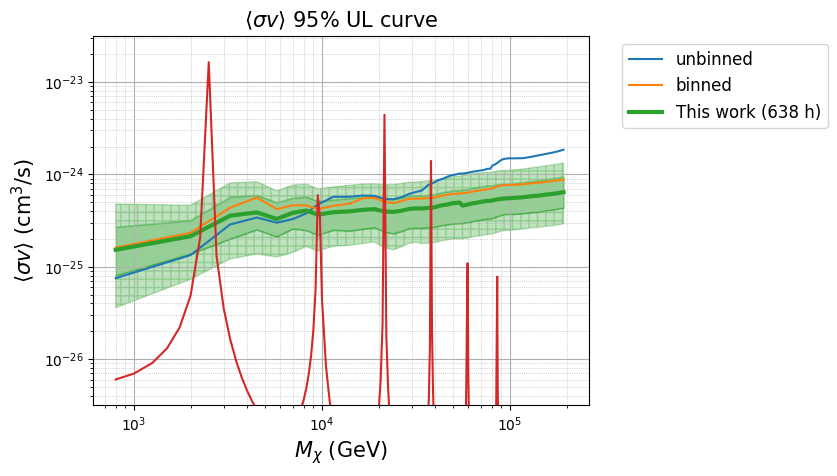

In [40]:
plotULcurve("EventDisplay_WINO_unbinned_shifted", label="unbinned")
plotULcurve("EventDisplay_WINO_binned_shifted", label="binned")
plotExpULcurve("EventDisplay_stacked_sys_wino_1D_final",add_mean=True, label="This work (638 h)")
plotPredictedLine()

In [93]:
uls

[]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

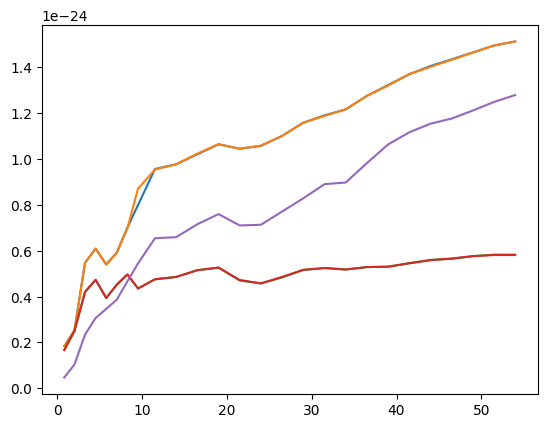

In [92]:
plt.plot(np.load("10.npy")[:,0][:,0]/10**3, 10**np.load("10.npy")[:,0][:,1], label="10 bins/decade (unbinned)")
plt.plot(np.load("6.npy")[:,0][:,0]/10**3, 10**np.load("6.npy")[:,0][:,1], label="6 bins/decade (unbinned)")
plt.plot(np.load("6_binned.npy")[:,0][:,0]/10**3, 10**np.load("6_binned.npy")[:,0][:,1], label="6 bins/decade (binned)")
plt.plot(np.load("10_binned.npy")[:,0][:,0]/10**3, 10**np.load("10_binned.npy")[:,0][:,1], label="10 bins/decade (binned)")
plt.plot(np.load("test.npy")[:,0][:,0]/10**3, 10**np.load("test.npy")[:,0][:,1], label="6 bins/decade (binned)")
plt.plot(np.load("test_binned.npy")[:,0][:,0]/10**3, 10**np.load("test_binned.npy")[:,0][:,1], label="10 bins/decade (binned)")


plotPredictedLine(units="TeV")
plt.yscale("log")
plt.axvline(2.8, ls="--", color="red")
plt.xscale("log")
plt.ylim(1e-26)
plt.xlim(0.8, 50)
plt.legend()

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.


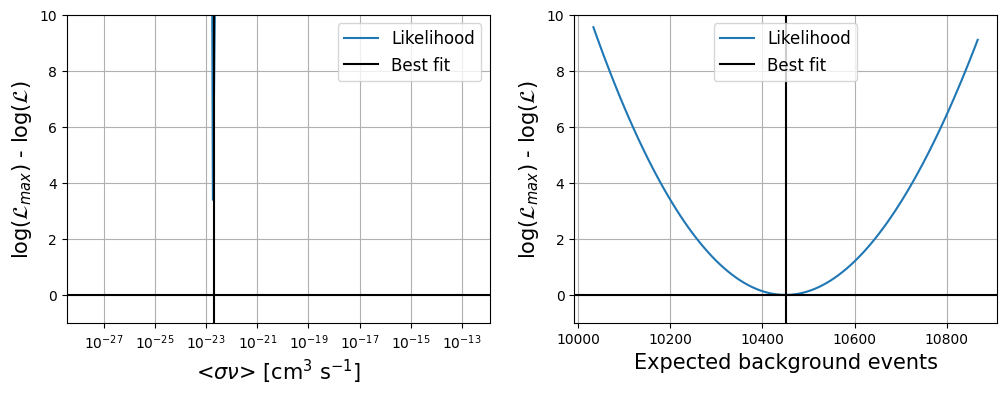

[Log, Error] The upper limit is not estimated (M=2.000 TeV).
[Log, Result] TS = 766.50 (M=2000 GeV)
[Log, Result] <σν> = 10^(-22.680 +/- 0.027)
[Log, Result] b = 10450 +/- 139 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = 3.54 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.041) (equivalent to 9.11e-25)
[Log, Result] b = 11217 +/- 150 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.370) (e

[Log] Step 3: A source model is loaded.
[Log] Step 4: Assigning probabilities for each event...

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
      Energy      
------------------
62290.446171057825


[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.779) (equivalent to 1.66e-25)
[Log, Result] b = 11290 +/- 138 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: Assigning probabilities for each event...

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
      Energy      
------------------
62290.446171057825


[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Resul

In [103]:
sig = []
for i in np.arange(10, 200, step=10):
    mle = Likelihood.MLE("Segue_1", 2000, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.geomspace(10, 10**7, i))
    mle.minuit(method=2)
    sig.append(mle.signu_ul)

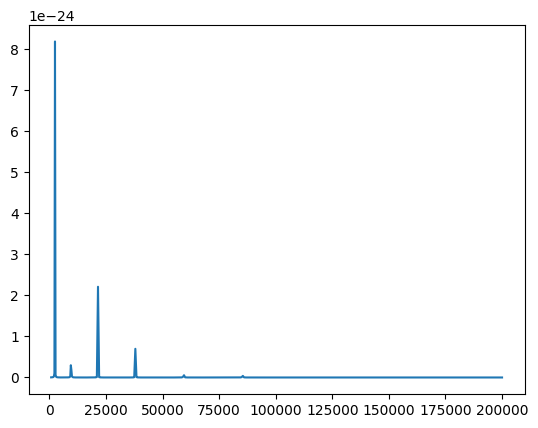

In [76]:
plt.plot(data["mass"], data["signu"])

In [34]:
10**-24.59216427

2.557618295920588e-25

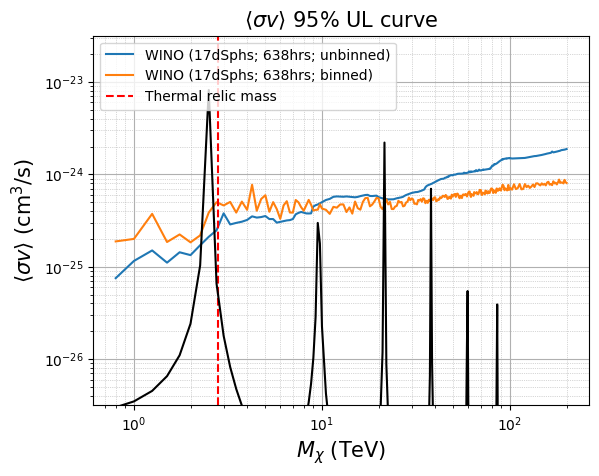

In [33]:
plotULcurve("wino_nlo_lo_combined", add_input="wino_nlo_hi_combined", label="WINO (17dSphs; 638hrs; unbinned)", units="TeV")
plotULcurve("wino_nlo_matt_binned", label="WINO (17dSphs; 638hrs; binned)", units="TeV")
plt.axvline(2.8, color="r", ls="--", label="Thermal relic mass")
plotPredictedLine(units="TeV")
#plt.axhline(10**-24.59216427)
plt.legend(loc=2, fontsize=10)

# Check John's Idea

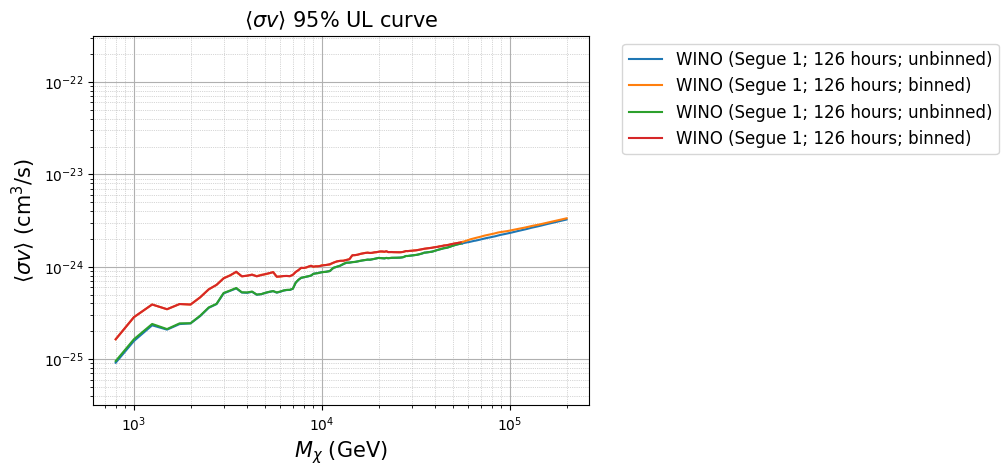

In [128]:
plotULcurve("wino_nlo", label="WINO (Segue 1; 126 hours; unbinned)")
plotULcurve("wino_nlo_lo_binned", label="WINO (Segue 1; 126 hours; binned)")
plotULcurve("wino_nlo_lo_c", label="WINO (Segue 1; 126 hours; unbinned)")
plotULcurve("wino_nlo_lo_binned_c", label="WINO (Segue 1; 126 hours; binned)")

plotULcurve("wino_nlo_hi", color="C0")
plotULcurve("wino_nlo_binned_hi", color="C1", addRelic=True)


# Check # of bins 

In [19]:
sig_3 = []
for i in [26, 51, 101]:
    ebins = np.linspace(2, 7, i)
    diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
    new_ebins = 10**(ebins-diff)
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2,
                                         ext=True, DM_spectra="WINO", energyEdges=new_ebins,
                                         mass=[2800], addTheta=False, averagedIRF=True, useBias=True, 
                                         correction=True, bkgModel="gaus", filename=False, statistic="binned",
                                        )
    sig_3.append(mle)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2800 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2800 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2800 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
 

In [21]:
sig_3 = np.asarray(sig_3)

In [22]:
10**np.asarray(sig_3)

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_91308/416311908.py:1: RuntimeWarning: overflow encountered in power
  10**np.asarray(sig_3)


array([[[           inf, 2.06264012e-25]],

       [[           inf, 3.00696348e-25]],

       [[           inf, 4.46815678e-25]]])

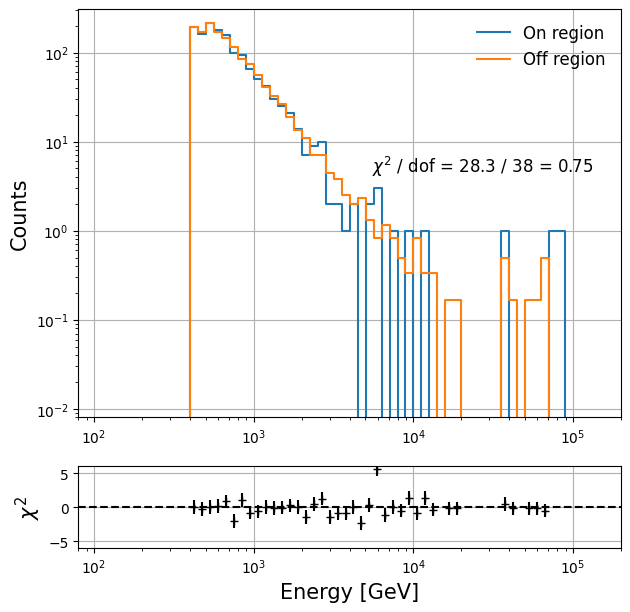

In [83]:
Likelihood.EventDisplay.plotData("UMa_II", ext=True, energyEdges = np.geomspace(100, 10**7, 101))

In [36]:
plt.plot(np.arange(10, 201, step=5), sig, label="2 TeV")
plt.plot(np.arange(10, 201, step=5), sig_3, label="3 TeV")

NameError: name 'sig' is not defined

# Shift bins

In [126]:
sig_s = []
for i in range(60):
    mle = Likelihood.MLE("Segue_1", 3000, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.logspace(1+0.001*i, 7+0.01*i, 101), verbose=False)
    mle.minuit(method=2)
    sig_s.append(mle.signu_ul)

ERROR! Session/line number was not unique in database. History logging moved to new session 2061


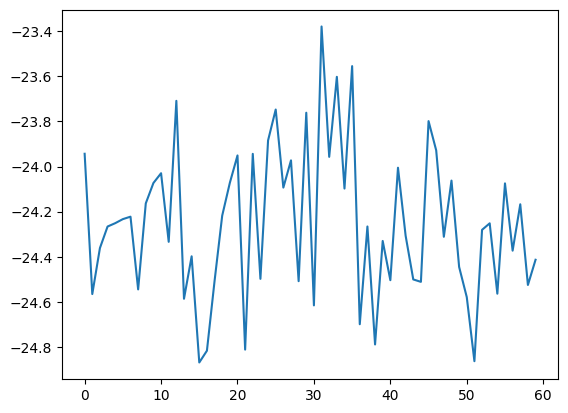

In [127]:
plt.plot(range(60), sig_s)